# Test `compare_venus_ctd` Module

Render figure object produced by the `nowcast.figures.publish.compare_venus_ctd` module.
Provides data for visual testing to confirm that refactoring has not adversely changed figure for web page.

Set-up and function call replicates as nearly as possible what is done in the `nowcast.workers.make_plots` worker.

Notebooks like this should be developed in a
[Nowcast Figures Development Environment](https://salishsea-nowcast.readthedocs.io/en/latest/figures/fig_dev_env.html)
so that all of the necessary dependency packages are installed.
The development has to be done on a workstation that has the Salish Sea Nowcast system `/results/` parition mounted.

In [1]:
import io
import os
from pathlib import Path

import arrow
import netCDF4 as nc
import yaml

from nowcast.figures.comparison import compare_venus_ctd

Python and library versions:

In [2]:
import bottleneck
import cmocean
import h5netcdf
import h5py
import matplotlib
import numpy
import sys
import xarray

print(f"Python {sys.version=}")
print(f"{numpy.__version__=}")
print(f"{xarray.__version__=}")
print(f"{bottleneck.__version__=}")
print(f"{h5netcdf.__version__=}")
print(f"{h5py.__version__=}")
print(f"{matplotlib.__version__=}")
print(f"{cmocean.__version__=}")

Python sys.version='3.13.1 | packaged by conda-forge | (main, Jan 13 2025, 09:53:10) [GCC 13.3.0]'
numpy.__version__='2.2.2'
xarray.__version__='2025.1.1'
bottleneck.__version__='1.4.2'
h5netcdf.__version__='1.5.0'
h5py.__version__='3.12.1'
matplotlib.__version__='3.10.0'
cmocean.__version__='v3.0.3'


This figure module needs to access the ONC web services API.
Doing so requires a user token which you can generate on the Web Services API tab of your
[ONC account profile page](http://dmas.uvic.ca/Profile).
The `_prep_plot_data()` function assumes that the token will be stored in an environment variable
named `ONC_USER_TOKEN`.
You can do that using a cell like the following,
but **be careful not to commit the notebook with your token in the cell**
or you will publish it to the world in this notebook.

In [3]:
import os
os.environ['ONC_USER_TOKEN'] = "my-token"
os.environ['ONC_USER_TOKEN'] = ""

## Simulate Nowcast System Config

The `config` multiline string contains the pieces of `nowcast/config/nowcast.yaml`
that are needed to set up the conditions as `nowcast.workers.make_plots` does
before calling the figure module `make_figure()` function.

The `yaml.safe_load()` call at the bottom of the cell converts the string into a `config` dict.

In [4]:
config = '''
    timezone: Canada/Pacific

    run_types:
        nowcast:
            config name: SalishSeaCast_Blue
            bathymetry: /SalishSeaCast/grid/bathymetry_202108.nc
            mesh_mask: /SalishSeaCast/grid/mesh_mask202108.nc
        nowcast-green:
            config name: SalishSeaCast
            bathymetry: /SalishSeaCast/grid/bathymetry_202108.nc
            mesh_mask: /SalishSeaCast/grid/mesh_mask202108.nc

    run:
        results_archive:
            nowcast: /results/SalishSea/nowcast/
            nowcast-green: /results2/SalishSea/nowcast-green.202111/
            forecast: /results/SalishSea/forecast/
'''

config = yaml.safe_load(io.StringIO(config))

In [5]:
run_date = arrow.get('2024-04-03')
run_type = 'nowcast-green'

dmy = run_date.format('DDMMMYY').lower()
start_day = {
    'nowcast-green': run_date.format('YYYYMMDD'),
    'forecast': run_date.shift(days=+1).format('YYYYMMDD'),
}
end_day = {
    'nowcast-green': run_date.format('YYYYMMDD'),
    'forecast': run_date.shift(days=+2).format('YYYYMMDD'),
}
ymd = run_date.format('YYYYMMDD')

results_home = Path(config['run']['results_archive'][run_type])
results_dir = results_home/dmy
dev_results_home = Path(config['run']['results_archive']['nowcast-green'])
dev_results_dir = dev_results_home/dmy

In [6]:
bathy = nc.Dataset(config['run_types'][run_type]['bathymetry'])
mesh_mask = nc.Dataset(config['run_types'][run_type]['mesh_mask'])
dev_mesh_mask = nc.Dataset(config['run_types']['nowcast-green']['mesh_mask'])
grid_T_hr = nc.Dataset(
    os.fspath(results_dir / f'SalishSea_1h_{start_day[run_type]}_{end_day[run_type]}_grid_T.nc'))
# dev_grid_T_hr = nc.Dataset(
#     str(dev_results_dir / f'SalishSea_1h_{start_day[run_type]}_{end_day[run_type]}_grid_T.nc'))
dev_grid_T_hr = None

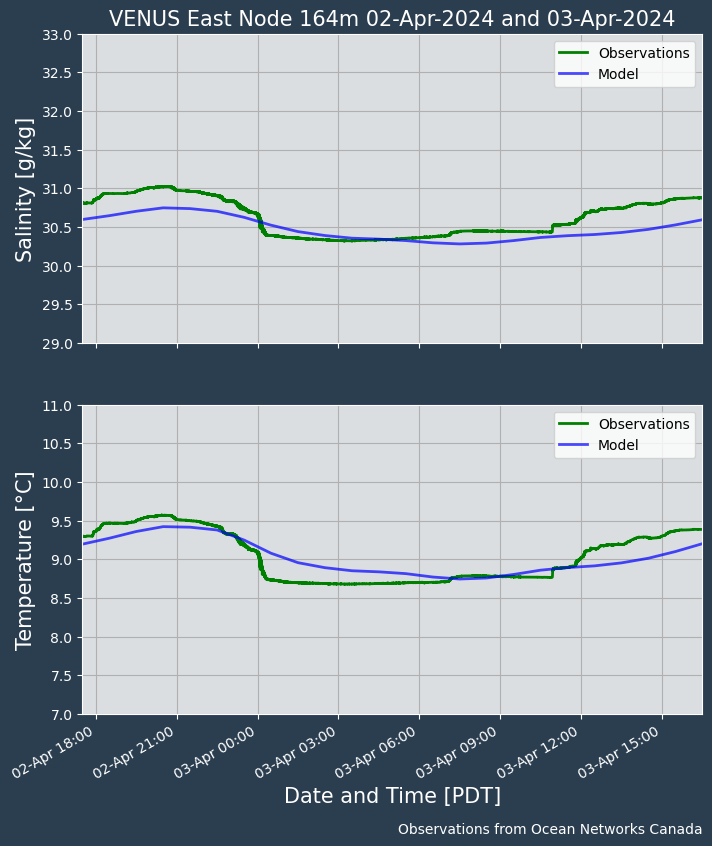

In [7]:
# %%timeit -n1 -r1

from importlib import reload
from nowcast.figures import website_theme, shared
from salishsea_tools import places, data_tools
reload(compare_venus_ctd)
reload(website_theme)
reload(shared)
reload(places)
reload(data_tools)

fig = compare_venus_ctd.make_figure(
    'East node', grid_T_hr, dev_grid_T_hr,
    config['timezone'], mesh_mask, dev_mesh_mask,
    theme=website_theme)

In [8]:
run_date = arrow.get('2023-04-03')
run_type = 'nowcast-green'

dmy = run_date.format('DDMMMYY').lower()
start_day = {
    'nowcast-green': run_date.format('YYYYMMDD'),
    'forecast': run_date.shift(days=+1).format('YYYYMMDD'),
}
end_day = {
    'nowcast-green': run_date.format('YYYYMMDD'),
    'forecast': run_date.shift(days=+2).format('YYYYMMDD'),
}
ymd = run_date.format('YYYYMMDD')

results_home = Path(config['run']['results_archive'][run_type])
results_dir = results_home/dmy
dev_results_home = Path(config['run']['results_archive']['nowcast-green'])
dev_results_dir = dev_results_home/dmy
grid_T_hr = nc.Dataset(
    os.fspath(results_dir / f'SalishSea_1h_{start_day[run_type]}_{end_day[run_type]}_grid_T.nc'))


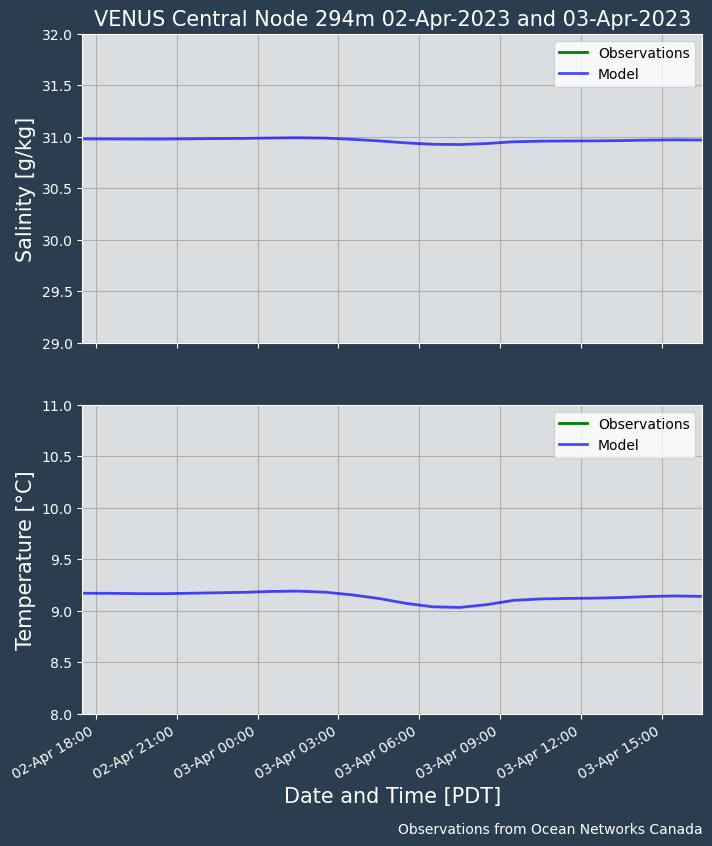

In [9]:
# %%timeit -n1 -r1

from importlib import reload
from nowcast.figures import website_theme, shared
from salishsea_tools import places, data_tools
reload(compare_venus_ctd)
reload(website_theme)
reload(shared)
reload(places)
reload(data_tools)

fig = compare_venus_ctd.make_figure(
    'Central node', grid_T_hr, dev_grid_T_hr,
    config['timezone'], mesh_mask, dev_mesh_mask,
    theme=website_theme)

In [10]:
run_date = arrow.get('2018-10-18')
run_type = 'nowcast-green'

dmy = run_date.format('DDMMMYY').lower()
start_day = {
    'nowcast-green': run_date.format('YYYYMMDD'),
    'forecast': run_date.shift(days=+1).format('YYYYMMDD'),
}
end_day = {
    'nowcast-green': run_date.format('YYYYMMDD'),
    'forecast': run_date.shift(days=+2).format('YYYYMMDD'),
}
ymd = run_date.format('YYYYMMDD')

results_home = Path(config['run']['results_archive'][run_type])
results_dir = results_home/dmy
dev_results_home = Path(config['run']['results_archive']['nowcast-green'])
dev_results_dir = dev_results_home/dmy
grid_T_hr = nc.Dataset(
    os.fspath(results_dir / f'SalishSea_1h_{start_day[run_type]}_{end_day[run_type]}_grid_T.nc'))


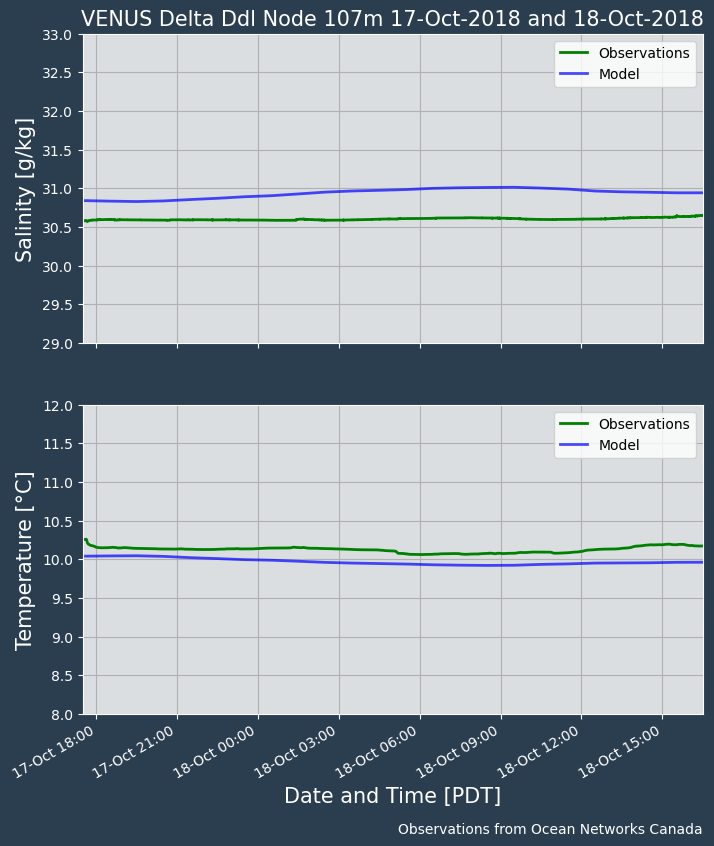

In [11]:
# %%timeit -n1 -r1

from importlib import reload
from nowcast.figures import website_theme, shared
from salishsea_tools import places, data_tools
reload(compare_venus_ctd)
reload(website_theme)
reload(shared)
reload(places)
reload(data_tools)

fig = compare_venus_ctd.make_figure(
    'Delta DDL node', grid_T_hr, dev_grid_T_hr,
    config['timezone'], mesh_mask, dev_mesh_mask,
    theme=website_theme, figsize=(8, 10))